In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
x_data = mnist.train.images
y_data = mnist.train.labels

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='sigmoid', dtype='float32'),
    tf.keras.layers.Dense(500, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='sigmoid', dtype='float32'),
    tf.keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.GlorotNormal(),
                          activation='softmax', dtype='float32')    
])

sgd = tf.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, 
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['acc'])

model.fit(x_data, y_data, batch_size=100, verbose=1, epochs=15)

Train on 55000 samples
Epoch 1/15
55000/55000 [==============================] - 15s 265us/sample - loss: 1.5012 - acc: 0.5285
Epoch 2/15
55000/55000 [==============================] - 14s 253us/sample - loss: 0.5323 - acc: 0.8520
Epoch 3/15
55000/55000 [==============================] - 14s 249us/sample - loss: 0.4050 - acc: 0.8841
Epoch 4/15
55000/55000 [==============================] - 14s 250us/sample - loss: 0.3610 - acc: 0.8952
Epoch 5/15
55000/55000 [==============================] - 14s 251us/sample - loss: 0.3369 - acc: 0.9019
Epoch 6/15
55000/55000 [==============================] - 14s 257us/sample - loss: 0.3220 - acc: 0.9064
Epoch 7/15
55000/55000 [==============================] - 14s 247us/sample - loss: 0.3091 - acc: 0.9097
Epoch 8/15
55000/55000 [==============================] - 14s 249us/sample - loss: 0.2990 - acc: 0.9123
Epoch 9/15
55000/55000 [==============================] - 14s 249us/sample - loss: 0.2905 - acc: 0.9156
Epoch 10/15
55000/55000 [================

Label :  [4]
Prediction :  [4]


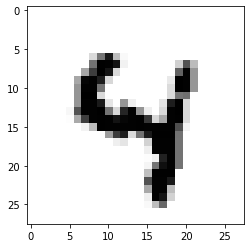

In [17]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label : ", np.argmax(mnist.test.labels[r:r+1], 1))
print("Prediction : ", tf.argmax(model.predict(mnist.test.images[r:r+1]), 1).numpy())

plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()